# Criando DataFrame de Nome dos Alunos a partir de uma Estrutura JSON

In [6]:
import pandas as pd

In [7]:
pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [8]:
pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [9]:
nomes_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')
nomes_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')

In [10]:
# Sortear alguns nomes aleatórios (quantidade)
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
182,LIDIANE,0,86963,183,F
2,FRANCISCA,0,721637,3,F
26,RITA,0,354720,27,F
184,MARILIA,0,86734,185,F
72,CAROLINE,0,212706,73,F


In [11]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
31,RICARDO,0,467835,32,M
88,GILMAR,0,159693,89,M
37,EDSON,0,430171,38,M
55,FLAVIO,0,265201,56,M
38,DIEGO,0,421973,39,M


In [12]:
soma_nomes = len(nomes_f) + len(nomes_m)
print(f'Quanditade de nomes: {str(soma_nomes)}')

Quanditade de nomes: 400


In [13]:
# Juntando os dois DataFrames em um novo
frames = [nomes_f, nomes_m]
nomes = pd.concat(frames)['nome'].to_frame()

In [14]:
nomes.sample(5)

,nome
176,CELIO
65,SILVANA
141,NEIDE
6,PEDRO
160,MOACIR


# Atribuindo IDs e Emails aos Alunos

In [15]:
import numpy as np

In [16]:
# Gerando números aleatórios baseados na sequência informada
np.random.seed(123)

In [17]:
total_alunos = len(nomes)
total_alunos

400

In [18]:
# Atribuindo IDs aleatórios aos alunos
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [19]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [20]:
# Criando domínios de email
dominios = ['@dominio.com.br', '@servico.com']

In [21]:
# Atribuir os domínios de emails aos alunos, fazendo escolhas da lista informada
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominio.com.br
0,JOSE,331,@servico.com
179,IAGO,340,@dominio.com.br
10,SANDRA,174,@dominio.com.br
171,TERESINHA,45,@dominio.com.br


In [22]:
# Concatenando o nomes ao domínio
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominio.com.br,arthur@dominio.com.br
57,DAIANE,303,@servico.com,daiane@servico.com
85,HELENA,221,@dominio.com.br,helena@dominio.com.br
183,IRACI,8,@dominio.com.br,iraci@dominio.com.br
189,DALVA,137,@dominio.com.br,dalva@dominio.com.br


# Criando a Tabela Cursos

In [23]:
!pip3 install html5lib
!pip3 install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import html5lib

In [25]:
# A partir de uma página HTML

##########################
# Erro ao acessar o link #
##########################

# url = 'http://tabela-cursos.herokuapp.com/index.html'
# pd.read_html(url)

In [26]:
cursos_list = ['Lógica de programação', 'Java para Web', 'C# para Web', 'Ruby on Rails', 'Cursos de Python', 'PHP com MySql', '.NET para web', 'Novas integrações com Java', 'TDD com Java', 'Código limpo com C#', 'Preparatório para certificação Java', 'Hardware básico', 'Persistência com .NET', 'Desenvolvendo jogos', 'Análise de dados', 'Estatística básica', 'Internet das coisas', 'Programação funcional', 'Boas práticas em Java', 'Orientação objetos com Java']
cursos = pd.DataFrame(cursos_list)

In [27]:
cursos

,0
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [28]:
type(cursos)

pandas.core.frame.DataFrame

In [29]:
cursos.head(5)

,0
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o Index dos Cursos

In [30]:
cursos = cursos.rename(columns={0: 'nome_do_curso'})

In [31]:
cursos['id'] = cursos.index + 1

In [32]:
cursos.head(5)

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [33]:
cursos = cursos.set_index('id')
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# Matriculando os Alunos nos Cursos

In [34]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominio.com.br,isabel@dominio.com.br
172,REBECA,165,@servico.com,rebeca@servico.com
130,JUNIOR,184,@dominio.com.br,junior@dominio.com.br
70,JOAQUIM,248,@servico.com,joaquim@servico.com
171,VALDEMIR,3,@dominio.com.br,valdemir@dominio.com.br


In [35]:
# Atribuindo matriculas aos alunos de forma aleatório, arredondando + 1
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
133,RUAN,130,@servico.com,ruan@servico.com,1
44,RAIMUNDA,259,@servico.com,raimunda@servico.com,1
50,RAFAELA,27,@dominio.com.br,rafaela@dominio.com.br,1
45,ADRIANO,196,@servico.com,adriano@servico.com,2
117,PAMELA,189,@dominio.com.br,pamela@dominio.com.br,1


In [36]:
nomes.matriculas.describe()

count    400.000000
mean       2.147500
std        1.619352
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [37]:
# Visualizando em forma de gráfico
import seaborn as sns

<ipython-input-38-b25f58d48343>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nomes.matriculas)


<Axes: xlabel='matriculas', ylabel='Density'>

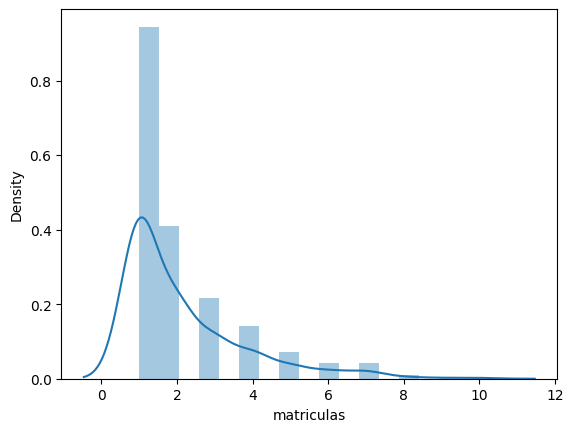

In [38]:
sns.distplot(nomes.matriculas)

In [39]:
nomes.matriculas.value_counts()

1     200
2      87
3      46
4      30
5      15
7       9
6       9
8       2
9       1
10      1
Name: matriculas, dtype: int64

# Selecionando Cursos aos Alunos

In [40]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
97,BARBARA,201,@servico.com,barbara@servico.com,1
170,ALEXANDRO,341,@servico.com,alexandro@servico.com,1
197,MICHAEL,323,@dominio.com.br,michael@dominio.com.br,2


In [41]:
# Setando as probabilidades de escolhas do curso, baseado no tamanho da lista de cursos
todas_matriculas = []
x = np.random.rand(len(cursos_list))
prob = x / sum(x)

In [42]:
# Atribuindo os cursos aos alunos e criando um novo DataFrame
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [43]:
matriculas.head()

,id_aluno,id_curso
0,235,6
1,235,16
2,43,6
3,43,11
4,43,12


In [44]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'qtd_alunos'})

In [45]:
matriculas_por_curso.head()

,qtd_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python


# Exportação de Dados

In [46]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [47]:
pd.read_csv('matriculas_por_curso.csv')

,qtd_alunos,nome_do_curso
0,59,Lógica de programação
1,31,Java para Web
2,53,C# para Web
3,4,Ruby on Rails
4,12,Cursos de Python
5,75,PHP com MySql
6,32,.NET para web
7,18,Novas integrações com Java
8,59,TDD com Java
9,40,Código limpo com C#


In [48]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"qtd_alunos":{"1":59,"2":31,"3":53,"4":4,"5":12,"6":75,"7":32,"8":18,"9":59,"10":40,"11":61,"12":66,"13":14,"14":27,"15":46,"16":43,"17":56,"18":53,"19":75,"20":35},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [49]:
matriculas_html = matriculas_por_curso.to_html()
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>qtd_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>59</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>31</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>53</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>4</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>12</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>75</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>32</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>18</td>\n      <td>Novas integrações com Java</td>\n    </tr>\n

In [50]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>qtd_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>59</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>31</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>53</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>12</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>75</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>32</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>18</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>59</td>
      <td>T

# Criando um Banco SQL

In [51]:
!pip install sqlalchemy
!pip install --upgrade 'sqlalchemy<2.0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
from sqlalchemy import create_engine, MetaData, Table, inspect

In [53]:
engine = create_engine('sqlite:///:memory:')
engine

Engine(sqlite:///:memory:)

In [54]:
type(engine)

sqlalchemy.engine.base.Engine

In [55]:
matriculas_por_curso.to_sql('matriculas', engine) # primeiro parametro é o nome da tabela

inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


# Querys

In [56]:
query = 'select * from matriculas where qtd_alunos < 20'

In [57]:
pd.read_sql(query, engine)

,id_curso,qtd_alunos,nome_do_curso
0,4,4,Ruby on Rails
1,5,12,Cursos de Python
2,8,18,Novas integrações com Java
3,13,14,Persistência com .NET


In [59]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'qtd_alunos'])

,nome_do_curso,qtd_alunos
0,Lógica de programação,59
1,Java para Web,31
2,C# para Web,53
3,Ruby on Rails,4
4,Cursos de Python,12
5,PHP com MySql,75
6,.NET para web,32
7,Novas integrações com Java,18
8,TDD com Java,59
9,Código limpo com C#,40


In [60]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'qtd_alunos'])

In [62]:
muitas_matriculas.query('qtd_alunos > 70')

,nome_do_curso,qtd_alunos
5,PHP com MySql,75
18,Boas práticas em Java,75


# Gravando no Banco

In [64]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

20

In [65]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


<ipython-input-65-7f622051bbf8>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


# Nomes de Alunos por Turmas

In [66]:
matriculas_por_curso

,qtd_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python
6,75,PHP com MySql
7,32,.NET para web
8,18,Novas integrações com Java
9,59,TDD com Java


In [67]:
matriculas

,id_aluno,id_curso
0,235,6
1,235,16
2,43,6
3,43,11
4,43,12
...,...,...
854,383,12
855,366,1
856,366,19
857,366,10


In [68]:
id_curso = 16
proxima_turma = matriculas.query(f"id_curso == {id_curso}")
proxima_turma

,id_aluno,id_curso
1,235,16
6,304,16
13,55,16
23,218,16
44,80,16
95,259,16
136,21,16
150,108,16
176,179,16
183,275,16


In [69]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
195,WALTER,231,@dominio.com.br,walter@dominio.com.br,2
90,ANDRESSA,213,@servico.com,andressa@servico.com,1
191,ERICK,124,@dominio.com.br,erick@dominio.com.br,1


In [70]:
# Realizando um Join
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
5,16,SEVERINA,@dominio.com.br,severina@dominio.com.br,4
21,16,BIANCA,@servico.com,bianca@servico.com,4
36,16,KARINA,@dominio.com.br,karina@dominio.com.br,1
48,16,ALISON,@servico.com,alison@servico.com,1
55,16,MARCIA,@dominio.com.br,marcia@dominio.com.br,3
80,16,VITORIA,@servico.com,vitoria@servico.com,4
108,16,LUIZA,@servico.com,luiza@servico.com,7
110,16,OSVALDO,@servico.com,osvaldo@servico.com,3
110,16,OSVALDO,@servico.com,osvaldo@servico.com,3


In [72]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
5       SEVERINA
21        BIANCA
36        KARINA
48        ALISON
55        MARCIA
80       VITORIA
108        LUIZA
110      OSVALDO
110      OSVALDO
148        THAIS
149     MARILENE
153    CONCEICAO
162       RAFAEL
164        MARIO
170    REGINALDO
179         TAIS
196      ADRIANO
202        ESTER
208         LUIZ
214        JAIME
218       CAMILA
222      IVONETE
235        MARIA
251        MAURO
255       WESLEY
259     RAIMUNDA
266        CELSO
275         EDNA
279       WILIAN
304    FRANCISCA
320       ARTHUR
340         IAGO
346       LURDES
354     EDIVALDO
364      ROBERTO
369      POLIANA
377      VALERIA
385       MICHEL
389      LIDIANE
390       MARCOS
392       NELSON
398     CRISTIAN
399       CICERA
Name: nome, dtype: object

In [73]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
5,SEVERINA
21,BIANCA
36,KARINA
48,ALISON
55,MARCIA
80,VITORIA
108,LUIZA
110,OSVALDO
110,OSVALDO


In [74]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [75]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [76]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [78]:
proxima_turma = proxima_turma.rename(columns={'nome': f'Alunos do Curso de {nome_curso}'})

In [79]:
proxima_turma.sample(3)

,Alunos do Curso de Estatística básica
id_aluno,
218,CAMILA
279,WILIAN
108,LUIZA


# Exportando para Excel

In [80]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [81]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do Curso de Estatística básica
0,SEVERINA
1,BIANCA
2,KARINA
3,ALISON
4,MARCIA
5,VITORIA
6,LUIZA
7,OSVALDO
8,OSVALDO
9,THAIS
